In [119]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc

Name: Ndiame Ndiaye

Student ID: 260744987

Exercise 1:

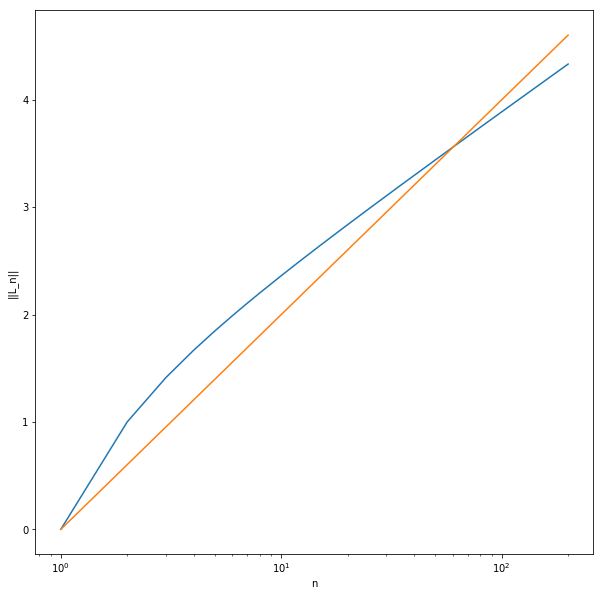

In [4]:
#Chebyshev interpolation
#The variable for the range is n, we will compute the values for i=1 to n.
n=200
xlist = np.linspace(1, n, n)
ylist=[]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
for i in range (n):
    nodes=[np.cos((2*k+1)/(2*i)*np.pi) for k in range(i)]
    #neg will be for phi(-1) and pos for phi(1)
    neg=0
    pos=0
    for j in range(i):
        posj=1
        negj=1
        for k in range(i):
            if(j != k):
                posj=posj*(1-nodes[k])/(nodes[j]-nodes[k])
                negj=negj*(-1-nodes[k])/(nodes[j]-nodes[k])
        neg=neg+np.absolute(negj)
        pos=pos+np.absolute(posj)
    ylist.append(np.maximum(neg,pos))
plt.xscale('log')
ylist2=[4/np.log(100)*np.log(x) for x in xlist]
ax1.plot(xlist,ylist,label='Growth')
ax1.plot(xlist,ylist2,label='Estimate')
ax1.set_xlabel('n')
ax1.set_ylabel('||L_n||')
plt.show()

We can see in the graph aboce that we have $||L_n||\approx \frac{4}{log(100)}*\log(n)$

Exercise 2:

$$\lambda_n'(x)=\sum_{k=0}^n(|\phi_{n,k}'|)(x)$$

We can show by induction that $(\prod_{i=0}^n f_i(x))'=\sum_{i=0}^n f_i'(x)*\prod_{j=0\ j\neq i}^n f_j(x)$. For $n=0,1,2$ this result is obvious and for $n>2$ we use the product rule on $f_n*\prod_{i=0}^{n-1} f_i$ which gives us our previous statment.

From this we can get the derivative for $\phi'_{n,k}$ and by summing we get that of $\lambda_n$. We have:
$$\lambda_n'(x)=\sum_{k=0}^n sgn(\phi_{n,k})\sum_{i=0\ i\neq k}^n \frac{1}{x_k-x_i}*\prod_{j=0\ j\neq i,k}^n \frac{x-x_j}{x_k-x_j}$$
We can use the same property as before to get the second derivative:
$$\lambda_n''(x)=\sum_{k=0}^n sgn(\phi_{n,k})\sum_{i=0\ i\neq k}^n \frac{1}{x_k-x_i}*\sum_{j=0\ j\neq i,k}^n \frac{1}{x_k-x_j}\prod_{l=0\ l\neq i,j,k}^n\frac{x-x_l}{x_k-x_l}$$

In [44]:
def iteration(x,n):
    xlist=[-1+2*i/n for i in range (n+1)]
    firstDerivative=0
    secondDerivative=0
    for k in range(n+1):
        #phi1 and phi2 are the first 2 derivatives of phi_(n,k)
        phi1=0
        phi2=0
        value=1
        for i in range(n+1):
            if(i != k):
                value=value*(x-xlist[i])/(xlist[k]-xlist[i])
                phi1i=1/(xlist[k]-xlist[i])
                phi2i=0
                for j in range(n+1):
                    if (j !=k and j!= i):
                        phi1i=phi1i*(x-xlist[j])/(xlist[k]-xlist[j])
                        phi2j=1/(xlist[k]-xlist[j])*1/(xlist[k]-xlist[i])
                        for l in range(n+1):
                            if (l !=k and l!= i and l!=j):
                                phi2j=phi2j*(x-xlist[l])/(xlist[k]-xlist[l])
                        phi2i=phi2i+phi2j
                phi1=phi1+phi1i
                phi2=phi2+phi2i
        sign=np.sign(value)
        phi1=phi1*sign
        phi2=phi2*sign
        firstDerivative=firstDerivative+phi1
        secondDerivative=secondDerivative+phi2
    return x-firstDerivative/secondDerivative

In [81]:
def value(epsilon,n):
    x1=-1+1/(2*n)
    x2=1-1/(2*n)
    y1=iteration(x1,n)
    y2=iteration(x2,n)
    nodes=[-1+2*i/n for i in range (n+1)]
    while (np.absolute(y1-x1)>epsilon):
        x1=y1
        y1=iteration(x1,n)
    while (np.absolute(y2-x2)>epsilon):
        x2=y2
        y2=iteration(x2,n)
    pos=0
    neg=0
    for k in range(n+1):
        posk=1
        negk=1
        for j in range(n+1):
            if(j != k):
                posk=posk*(x1-nodes[j])/(nodes[k]-nodes[j])
                negk=negk*(x2-nodes[j])/(nodes[k]-nodes[j])
        neg=neg+np.absolute(negk)
        pos=pos+np.absolute(posk)
    return np.maximum(neg,pos)  

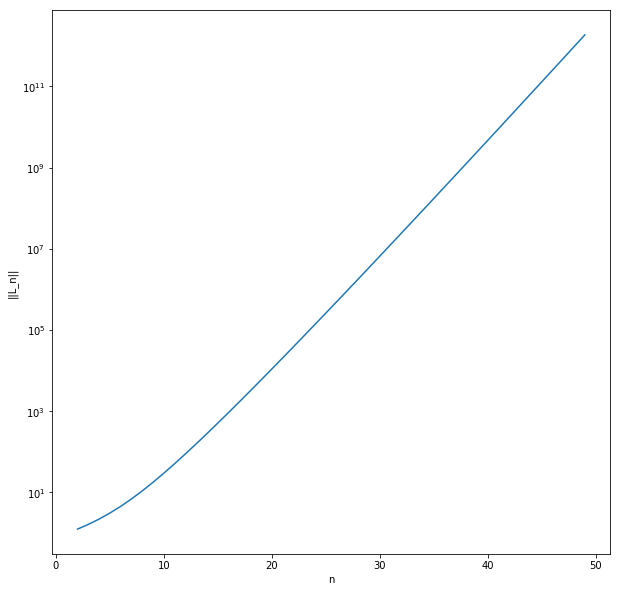

In [82]:
#Chebyshev interpolation
#The variable for the range is n, we will compute the values for i=1 to n.
n=50
xlist = range(2,n)
ylist=[value(0.0000001,x) for x in xlist]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
plt.yscale('log')
ax1.plot(xlist,ylist,label='Growth')
ax1.set_xlabel('n')
ax1.set_ylabel('||L_n||')
plt.show()

It's clear from the above graph that the rate of the growth of $||L_n||$ is exponential.

Question 3:

We wish to apply the composite trapezoidal rule to estimate the integral:
$$||S_n||=\int_0^\pi |\frac{\sin((n+\frac{1}{2})\theta)}{2\sin(2\theta)}|d\theta$$

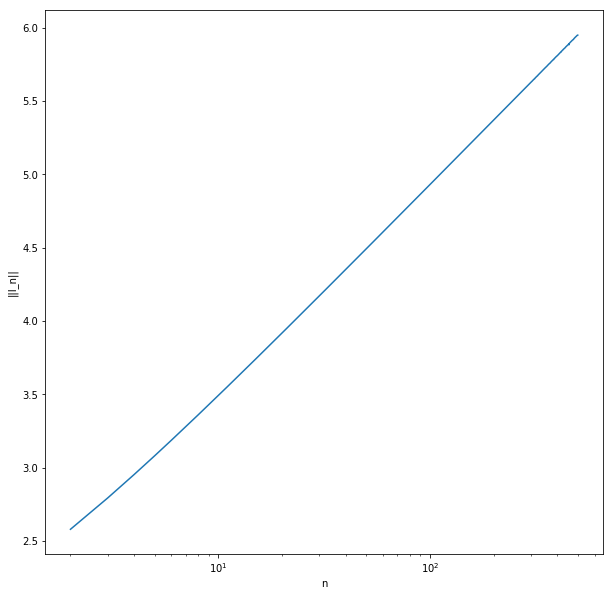

In [84]:
n=500
InList=[]
for k in range(2,n):
    list=np.linspace(0.00000001,np.pi,10000)
    imageList=[np.absolute(np.sin((k+1/2)*x)/(np.sin(x/2)*2)) for x in list]
    In=0
    for i in range(len(list)-1):
        In=In+(imageList[i]+imageList[i+1])*(list[i+1]-list[i])/(2)
    InList.append(In)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
plt.xscale('log')
ax1.plot(range(2,n),InList,label='Growth')
ax1.set_xlabel('n')
ax1.set_ylabel('||I_n||')
plt.show()

With the previous graph, we can estimate $||I_n||$ by $\ln(n)$ since this seems linear when giving enough points and $||I_{100}||=5=\ln(100)$

Exercise 4:

We wish to apply the composite trapezoidal rule to estimate the integral:
$$||S_n||=\int_0^\pi |\sum_{k=0}^{n} (k+\frac{1}{2})*P_k(x)|d\theta$$

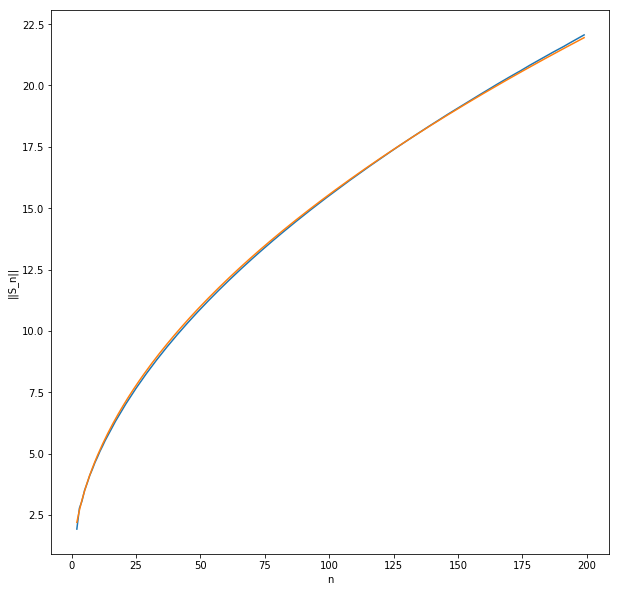

In [145]:
n=200
m=50000
list=np.linspace(-1,1,m)
InList=[[1,x] for x in list]
yList=[]
imageList=[0 for x in list]
for k in range(2,n):
    for i in range(m):
        x=list[i]
        InList[i].append(((2*k-1)*x*InList[i][k-1]-(k-1)*InList[i][k-2])/k)
    for i in range(m):
        imageList[i]=imageList[i]+InList[i][k]*(k+1/2)
    In=0
    for i in range(len(list)-1):
        In=In+(np.absolute(imageList[i])+np.absolute(imageList[i+1]))*(list[i+1]-list[i])/(2)
    yList.append(In)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ylist2=[22/np.sqrt(200)*np.sqrt(x) for x in range(2,n)]
ax1.plot(range(2,n),yList,label='Growth')
ax1.plot(range(2,n),ylist2,label='Estimate')
ax1.set_xlabel('n')
ax1.set_ylabel('||S_n||')
plt.show()

With this we see that $||S_n||$ is close to $\frac{22}{\sqrt{200}}n$

Exercise 5:

We will compute the weights then we will compute the norm.

In [134]:
def weight(x,n,k):
    nodes=[i/n for i in range(n)]
    valuek=1
    for i in range(n):
        if(i != k):
            valuek=valuek*(x-nodes[i])/(nodes[k]-nodes[i])
    return valuek

In [156]:
def sumWeights(x,n):
    sum=0
    for i in range(n):
        sum=sum+np.absolute(weight(x,n,i))
    return sum

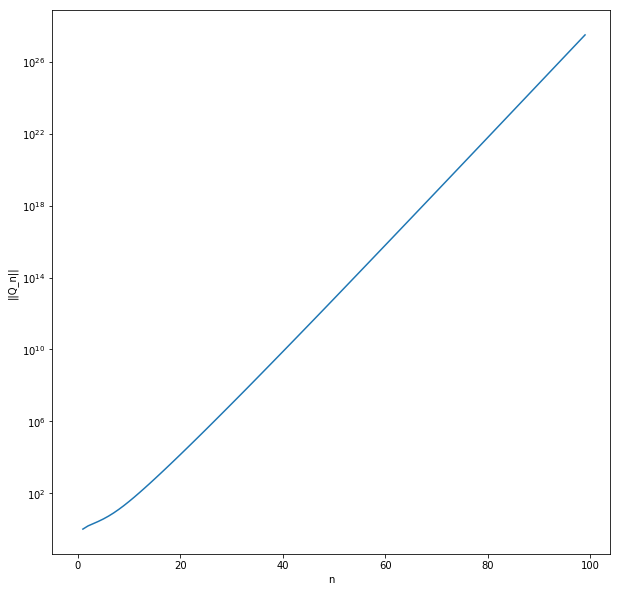

In [161]:
m=100
n=1000
yList=[]
list=np.linspace(0,1,m)
for i in range (m):
    value=0
    imageList=[sumWeights(x,i) for x in list]
    Qn=0
    for i in range(len(list)-1):
        Qn=Qn+(imageList[i]+imageList[i+1])*(list[i+1]-list[i])/(2)
    yList.append(Qn)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
plt.yscale('log')
ax1.plot(range(m),yList,label='Growth')
ax1.set_xlabel('n')
ax1.set_ylabel('||Q_n||')
plt.show()

From the previous graph, we can conjecture that $||Q_n||$ grows at an exponential rate.